<a href="https://colab.research.google.com/github/Tarunsri1998/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

##**Importing Libraries and Mounting the DRIVE**

In [3]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder

import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Loading the Dataset
credit_card_df=pd.read_csv("/content/drive/MyDrive/CAPSTONE/Credit Card Default Prediction/default of credit card clients.xls - Data (1).csv")

###**Introduction to the data**

In [7]:
# Viewing the data of top 5 rows to take a glimps of the data
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Viewing the data of bottom 5 rows to take a glimps of the data
credit_card_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [9]:
# Shape of the Dataset
credit_card_df.shape

(30000, 25)

In [10]:
# All column Names
print('Features of the Dataset:')
credit_card_df.columns

Features of the Dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Create a copy of dataset
credit_df=credit_card_df.copy()

In [12]:
# Checking the copy created
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# Deatails about the dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [14]:
# To know the unique values in the Dataset
credit_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [15]:
# Description of the Dataset to know the insights of the Dataset
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


###**PRE-PROCESSING OF THE DATSET**

**1. Missing Values**

The real-world data often has a lot of missing values. The missing values can cause data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first

In [16]:
#check for count of missing values in each column.
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**Thankfully there is no NULL Values in the Dataset**

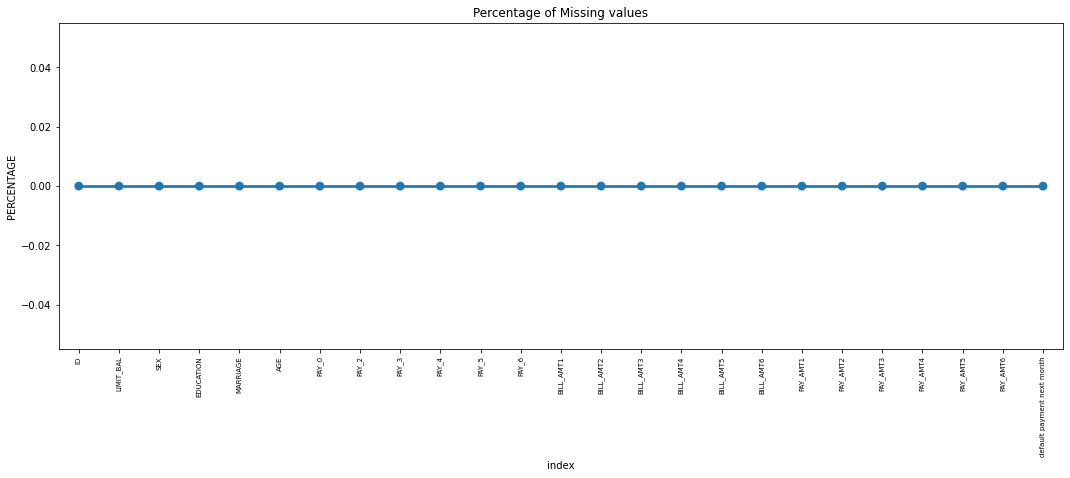

In [17]:
# Plotting missing values count in Percentage for Better understandings.
missing = pd.DataFrame((credit_df.isnull().sum())*100/credit_df.shape[0]).reset_index()
plt.figure(figsize=(18,6))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**2. Duplicate Values**

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [18]:
# Checking Duplicate Values
value=len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**Thankfully there is no Duplicate Values present in the Dataset**

###**About Dataset**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:



*   ID: ID of each client

*  LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

*  SEX: Gender (1=male, 2=female) 

*   EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

*   MARRIAGE: Marital status (1=married, 2=single, 3=others)

*  AGE: Age in years 

*  PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

*  PAY_2: Repayment status in August, 2005 (scale same as above)

*   PAY_3: Repayment status in July, 2005 (scale same as above)

*   PAY_4: Repayment status in June, 2005 (scale same as above)

*   PAY_5: Repayment status in May, 2005 (scale same as above)

*   PAY_6: Repayment status in April, 2005 (scale same as above)

*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar

*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar

*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

*   default.payment.next.month: Default payment (1=yes, 0=no)





##**EXPLORATARY DATA ANALYSIS OF THE DATASET**

###**1.Default payment next month.(Distribution of Labels)**





In [19]:
# Distribution of defaults
credit_df=credit_df.rename(columns={'default payment next month':'default'})
credit_df.default.value_counts()

0    23364
1     6636
Name: default, dtype: int64

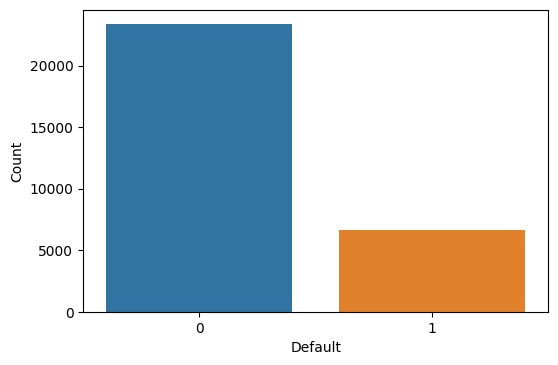

In [122]:
plt.figure(dpi=100)
sns.countplot(x="default", data=credit_df)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

**Most of the default payments for next month is YES(Which menas around 24000 people are paying next month).**

###**2.Gender**

In [20]:
def sex1(x):
    if (x==1):
        return "Male"
    else:
        return "Female"
credit_df['SEX']=credit_card_df['SEX'].apply(sex1)

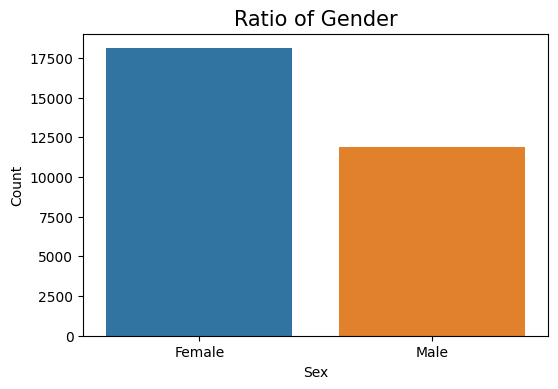

In [21]:
plt.figure(dpi=100)
credit_df.SEX.value_counts()
sns.countplot(x="SEX", data=credit_df)
plt.title("Ratio of Gender", size=15)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

###**3.Education.**

In [22]:
credit_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [23]:
def edu(x):
    if (x==0) or (x==5) or (x==6):
        x=4
    return x
credit_card_df['EDUCATION']=credit_card_df['EDUCATION'].apply(edu)
credit_df['EDUCATION']=credit_df['EDUCATION'].apply(edu)

In [24]:
def edu1(x):
    if (x==1):
        return "Graduate school"
    elif (x==2):
        return "University"
    elif (x==3):
        return "High School"
    else:
        return "Others"
credit_df['EDUCATION']=credit_df['EDUCATION'].apply(edu1)

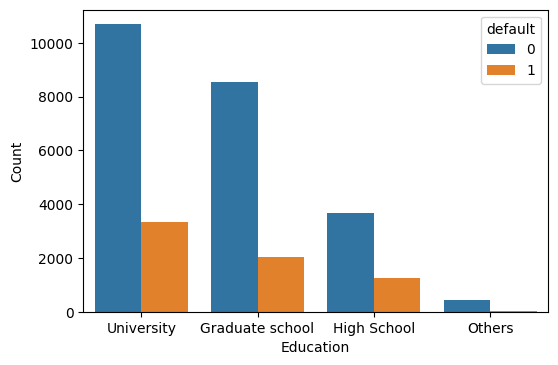

In [25]:
plt.figure(dpi=100)
credit_df.EDUCATION.value_counts()
sns.countplot(x="EDUCATION", hue="default", data=credit_df)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

###**4.Marriage**

In [26]:
credit_card_df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [27]:
def marriage(x):
    if (x==0):
        x=3
    return x
credit_card_df['MARRIAGE']=credit_card_df['MARRIAGE'].apply(marriage)
credit_df['MARRIAGE']=credit_df['MARRIAGE'].apply(marriage)

In [28]:
def marriage1(x):
    if (x==1):
        return "Married"
    elif (x==2):
        return "Single"
    else:
        return "Others"
credit_df['MARRIAGE']=credit_df['MARRIAGE'].apply(marriage1)

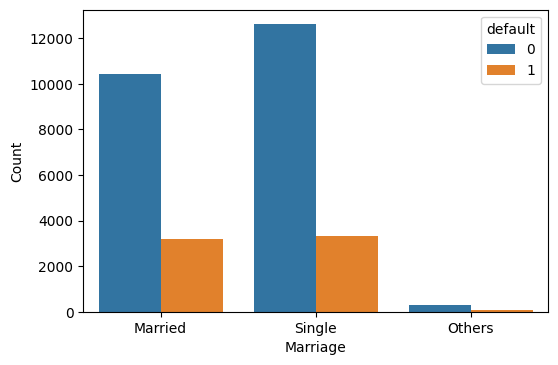

In [29]:
plt.figure(dpi=100)
credit_df.MARRIAGE.value_counts()
sns.countplot(x="MARRIAGE", hue="default", data=credit_df)
plt.xlabel("Marriage")
plt.ylabel("Count")
plt.show()

###**5.Age.**

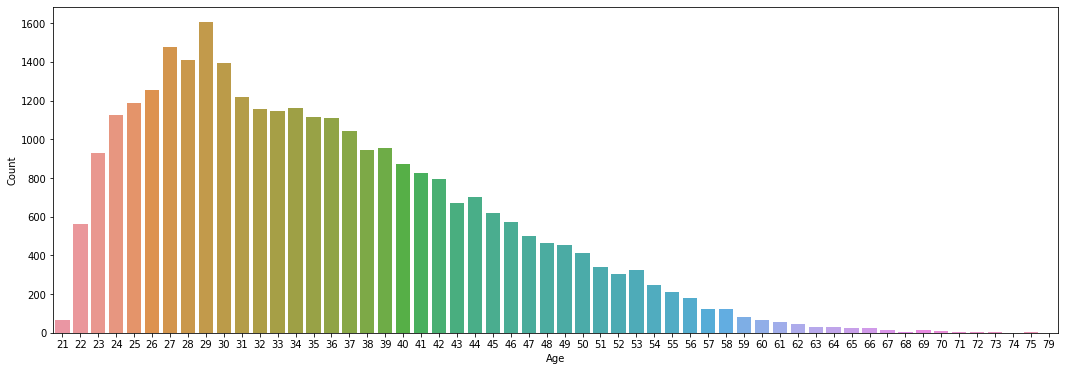

In [30]:
plt.figure(figsize=(18,6))
age=credit_df['AGE'].value_counts().reset_index()
sns.barplot(x='index',y='AGE',data=age,orient='v')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Dropping ID column**

In [31]:
# Dropping unnecessary column
credit_df.drop(['ID'], axis=1, inplace=True)

In [32]:
# find categorical variables
categorical = [var for var in credit_df.columns if credit_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [33]:
# find Numerical variables
numerical = [var for var in credit_df.columns if credit_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 21 numerical variables


In [34]:
discrete = []
for var in numerical:
    if len(credit_df[var].unique())<20:
        print(var, ' values: ', credit_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

PAY_0  values:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2  values:  [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3  values:  [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4  values:  [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5  values:  [-2  0 -1  2  3  5  4  7  8  6]
PAY_6  values:  [-2  2  0 -1  3  6  4  7  8  5]
default  values:  [1 0]
There are 7 discrete variables


In [35]:
continuous = [var for var in numerical if var not in discrete and var not in ['Id']]

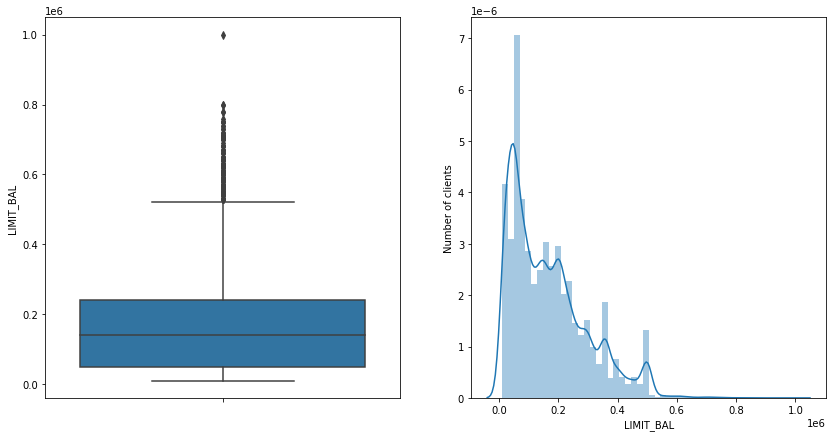

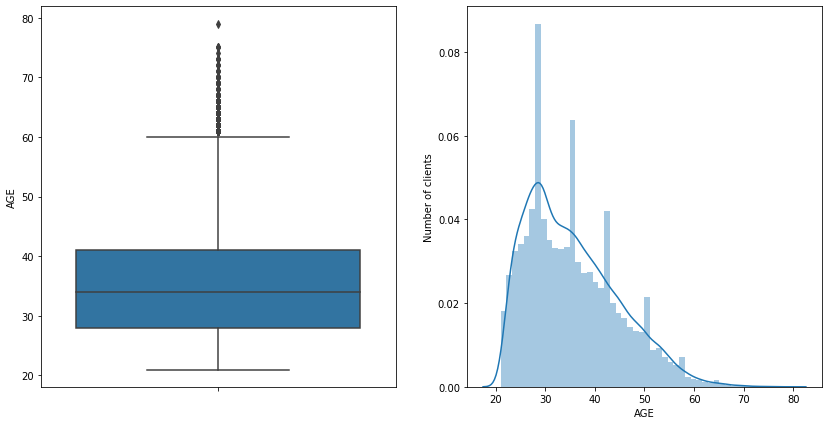

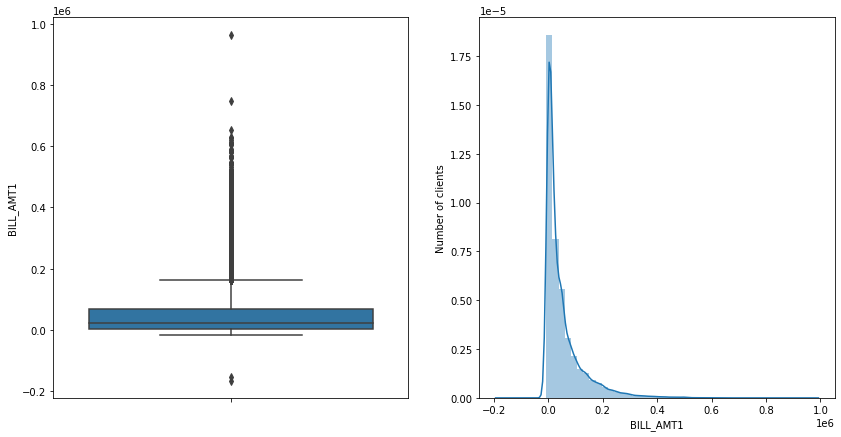

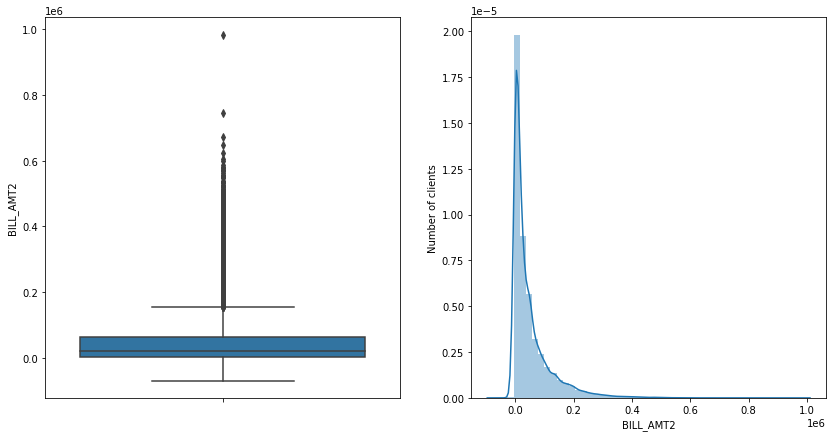

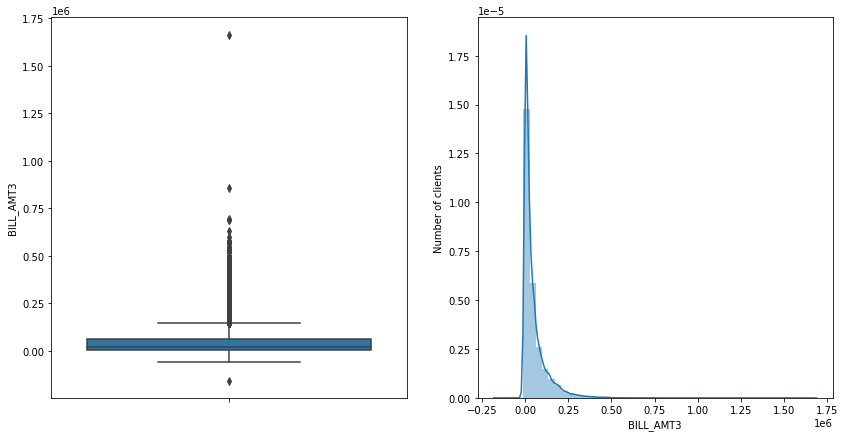

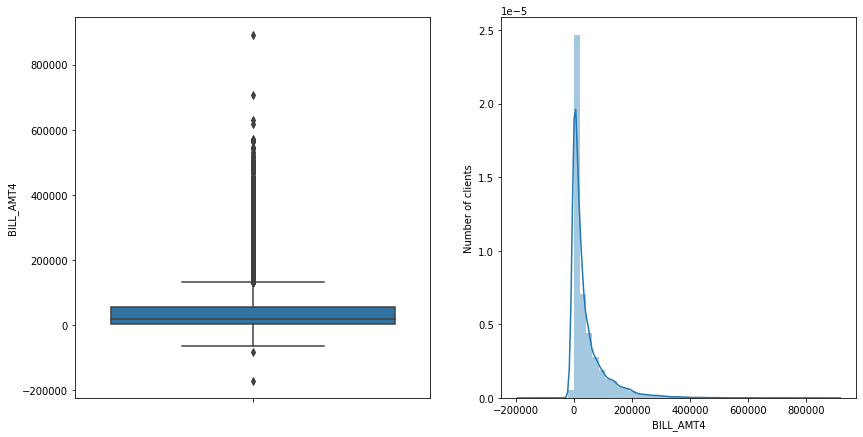

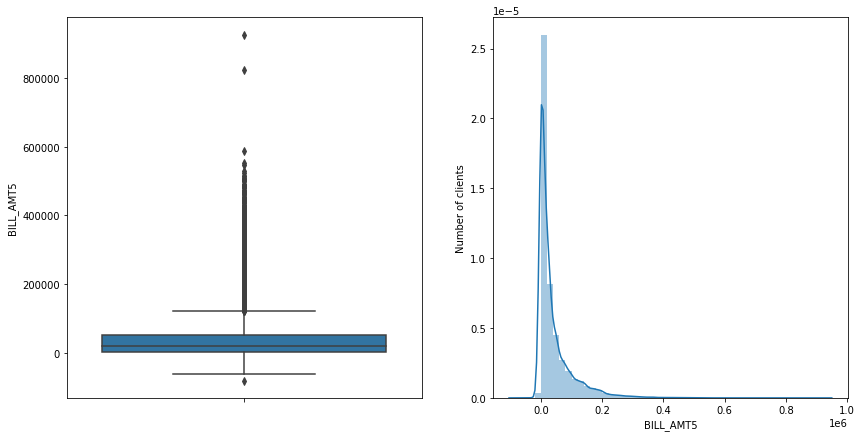

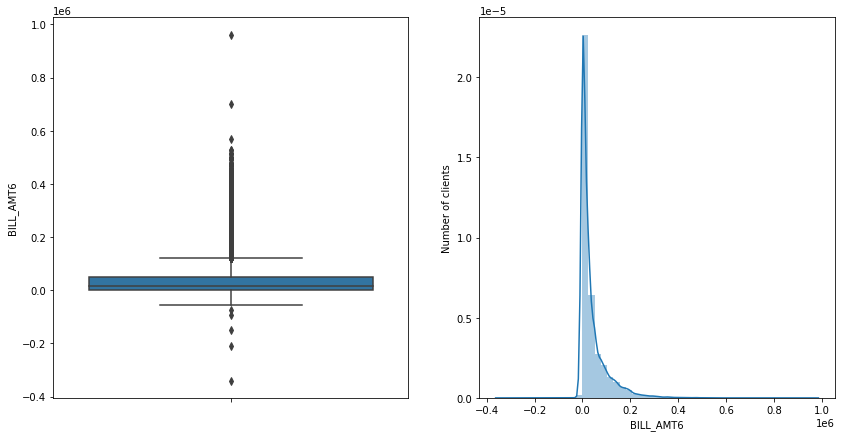

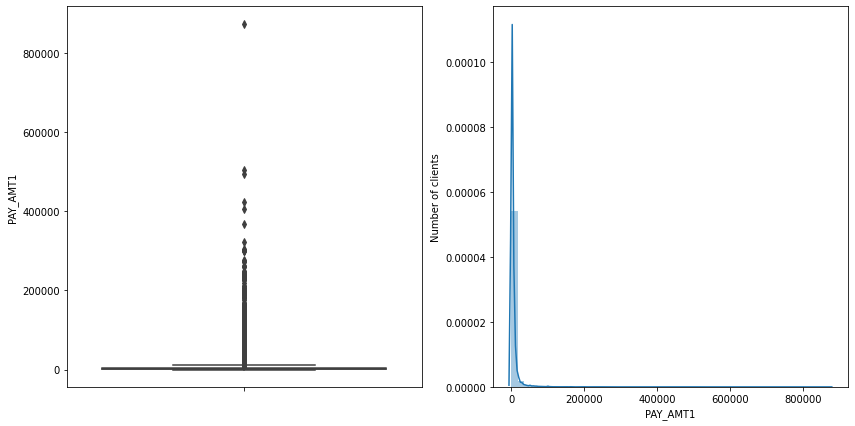

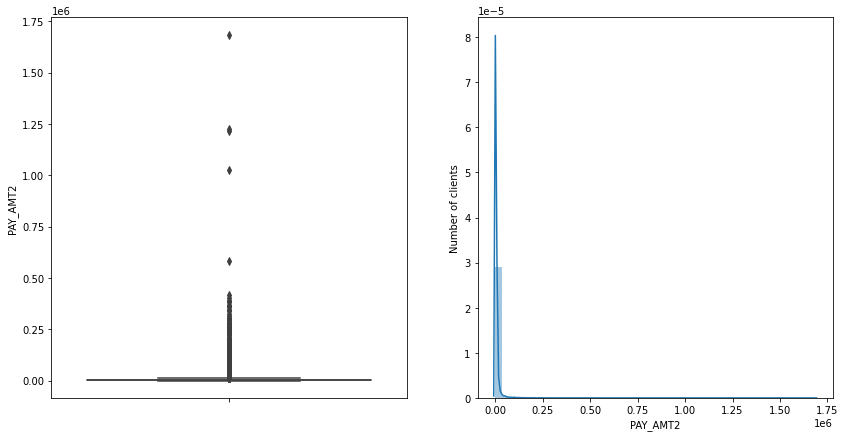

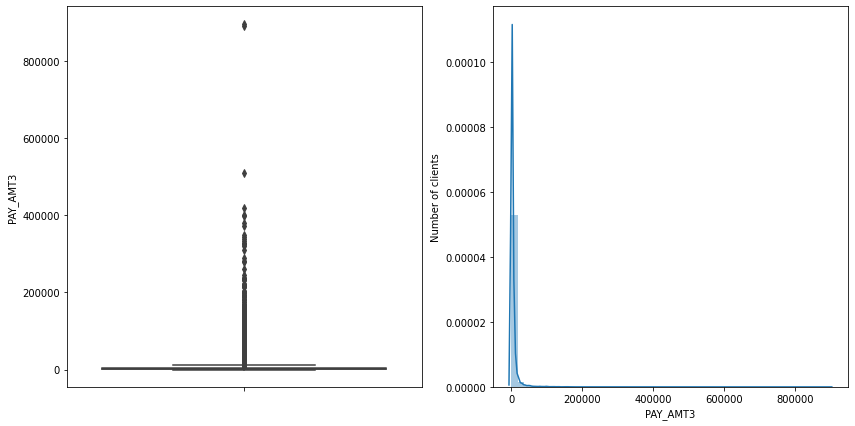

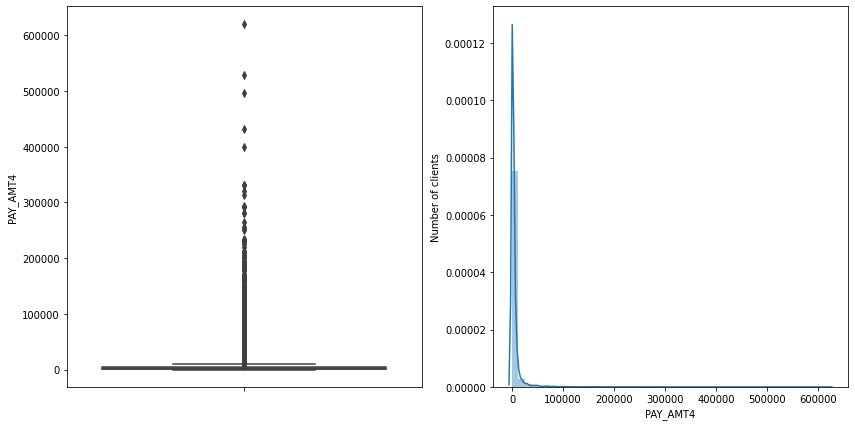

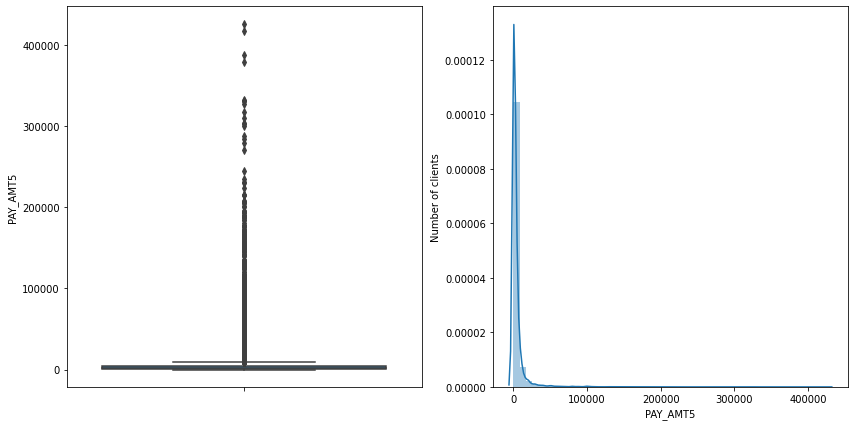

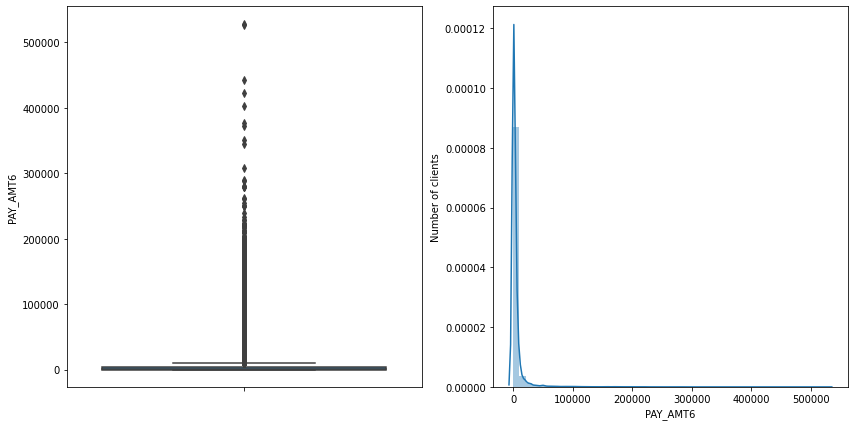

In [39]:
for var in continuous:
    plt.figure(figsize=(14,7))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=credit_df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(credit_df[var].dropna())
    fig.set_ylabel('Number of clients')
    fig.set_xlabel(var)

    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we should tackle these to improve the model performance.

In [41]:
#Capping the outlier rows with Percentiles
upper_lim = credit_df['LIMIT_BAL'].quantile(.95)
lower_lim = credit_df['LIMIT_BAL'].quantile(.05)
credit_df.loc[(credit_df["LIMIT_BAL"] > upper_lim),"LIMIT_BAL"] = upper_lim
credit_df.loc[(credit_df["LIMIT_BAL"] < lower_lim),"LIMIT_BAL"] = lower_lim

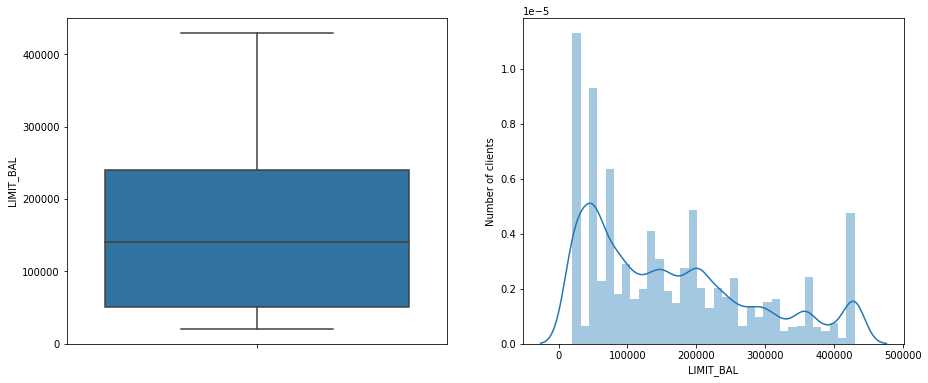

In [42]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=credit_df["LIMIT_BAL"])
fig.set_title('')
fig.set_ylabel("LIMIT_BAL")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(credit_df["LIMIT_BAL"].dropna())
fig.set_ylabel('Number of clients')
fig.set_xlabel("LIMIT_BAL")

plt.show()

In [44]:
 #outlies in discrete variables
for var in discrete:
    print(credit_df[var].value_counts() / np.float(len(credit_df)))
    print()

 0    0.491233
-1    0.189533
 1    0.122933
-2    0.091967
 2    0.088900
 3    0.010733
 4    0.002533
 5    0.000867
 8    0.000633
 6    0.000367
 7    0.000300
Name: PAY_0, dtype: float64

 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
Name: PAY_2, dtype: float64

 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
Name: PAY_3, dtype: float64

 0    0.548500
-1    0.189567
-2    0.144933
 2    0.105300
 3    0.006000
 4    0.002300
 7    0.001933
 5    0.001167
 6    0.000167
 1    0.000067
 8    0.000067
Name: PAY_4, dtype: float64

 0    0.564900
-1    0.184633
-2    0.151533
 2    0.087533
 3    0.005933
 4    0.002800
 7    0.001933
 5    0.000567
 6    0.000133
 8    0.000033
Name: PAY_5, dtype: float64

 0    0.542867
-1    0.191333
-2    0.163167
